# 문자열 데이터

- 범주형 데이터
- 범주에 의미를 연결시킬 수 있는 임의 문자열
- 구조화된 문자열 / 장소, 이름, 번호 등
- 텍스트 데이터(자유로운..) / corpus


- 텍스트로 직접 입력을 받는 것은 자동 매핑이 어렵기 때문에 피해야 함

In [10]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_files

### 영화 리뷰 데이터


- 1-4 음성 / 7-10 양성        부정/긍정

In [11]:
!tree aclImdb

폴더 PATH의 목록입니다.
볼륨 일련 번호는 FA7A-2A7C입니다.
C:\USERS\LGPC\DOCUMENTS\MACHINELEARNING\12주차\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    └─pos


In [2]:


reviews_train = load_files("./aclImdb/train/")

text_train, y_train = reviews_train.data, reviews_train.target


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html



- load_files/ 폴더명으로 클래스를 구별해줌...

In [14]:
print(type(text_train))
print(text_train[0])

<class 'list'>
b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."


In [16]:
print(np.bincount(y_train))

# 0 / 1   같은 비율...

[12500 12500]


중간 \<br /> 과 같은 태그 존재... - > 지우기

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
# <br /> 태그 ->  ' ' 공백으로 치환

In [20]:
text_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty."

In [4]:
reviews_test = load_files("aclImdb/test/")

text_test, y_test = reviews_test.data, reviews_test.target

print(len(text_test))
print(np.bincount(y_test))

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

25000
[12500 12500]


## Bag of Word(Bow)

- 순서에 상관없이 단어 출현 횟수 카운트
- 토큰화(공백, 구두점 기준)
- 어휘 사전 구축(알파벳 순서) 후 단어 빈도수 계산

In [5]:


vect = CountVectorizer()
# 토큰으로 나누고 어휘사전 구축해서 vocabulary_ 속성에 저장함

bards_words = ["The fool doth think he is wise",
              "but the wise man knows himself to be a fool"]
vect.fit(bards_words)

# token_pattern // 공백 사이의 둘 이상의 문자나 숫자가 연속된 단어
# = 한 글자는 무시...  조정 가능함
# 대소문자 구분 X

CountVectorizer()

In [24]:
print("어휘 사전의 크기 : ", len(vect.vocabulary_))
print("어휘 사전의 내용 : \n", vect.vocabulary_)

어휘 사전의 크기 :  13
어휘 사전의 내용 : 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [25]:
bag_of_words = vect.transform(bards_words)
bag_of_words

# 희소행렬이기 때문에 0이 아닌것만 인덱스로 저장

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [26]:
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [27]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train  : ", repr(X_train))


# 단어 74849개

X_train  :  <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [30]:
feature_names = vect.get_feature_names()
print("특성 개수 :\n ", len(feature_names))
print("첫 20개 :\n ", feature_names[:20])
print("매 2000번째 특성 \n: ", feature_names[::2000])

특성 개수 :
  74849
첫 20개 :
  ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
매 2000번째 특성 
:  ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


첫 20개.. 숫자 특성이 많다. 

In [36]:


cvs = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
cvs

array([0.8824, 0.876 , 0.8818, 0.8884, 0.8776])

In [37]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}


grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [38]:
print("최상 교차 검증 점수 : ", grid.best_score_)
print("최적 매개변수 : ", grid.best_params_)

최상 교차 검증 점수 :  0.8881599999999998
최적 매개변수 :  {'C': 0.1}


In [39]:
X_test = vect.transform(text_test)
print("테스트 점수 : ", grid.score(X_test, y_test))

테스트 점수 :  0.87892


In [40]:
# 최소한 다섯개 이상의 문서에서 나타난 단어만 추출

vect_f = CountVectorizer(min_df=5).fit(text_train)
X_train = vect_f.transform(text_train)
X_test = vect_f.transform(text_test)

In [44]:
print("min_df로 제한\n")
feature_names = vect_f.get_feature_names()
print("특성 개수 :\n ", len(feature_names))
print("첫 20개 :\n ", feature_names[:20])
print("매 2000번째 특성 \n: ", feature_names[::2000])

min_df로 제한

특성 개수 :
  27271
첫 20개 :
  ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103']
매 2000번째 특성 
:  ['00', 'baked', 'centipede', 'cutlery', 'elton', 'gaining', 'ideals', 'leering', 'moxy', 'picasso', 'repartee', 'silvers', 'talkative', 'verisimilitude']


In [42]:
grid =GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("최상 교차 검증 점수 : ", grid.best_score_)
print("최적 매개변수 : ", grid.best_params_)
print("테스트 점수 : ", grid.score(X_test, y_test))

최상 교차 검증 점수 :  0.88812
최적 매개변수 :  {'C': 0.1}
테스트 점수 :  0.8778


In [45]:
# 불용어 처리
# 너무 빈번하여 유용하지 않은 단어

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# sklearn에서 제공하는 불용어 모음

print("불용어 개수 : ", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어 : ", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수 :  318
매 10번째 불용어 :  ['from', 'the', 'next', 'first', 'very', 'none', 'other', 'whole', 'my', 'became', 'anywhere', 'indeed', 'although', 'up', 'beyond', 'whither', 'seeming', 'behind', 'both', 'should', 'she', 'of', 'elsewhere', 'themselves', 'they', 'her', 'over', 'being', 'keep', 'thereafter', 'empty', 'afterwards']


In [46]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
# 지정된 목록 사용 가능
X_train = vect.transform(text_train)

print("불용어 제거 후 훈련 : ", repr(X_train))

불용어 제거 후 훈련 :  <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [48]:
grid =GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

X_test = vect.transform(text_test)
print("최상 교차 검증 점수 : ", grid.best_score_)
print("최적 매개변수 : ", grid.best_params_)
print("테스트 점수 : ", grid.score(X_test, y_test))

최상 교차 검증 점수 :  0.8828400000000001
최적 매개변수 :  {'C': 0.1}
테스트 점수 :  0.87256


최소 등장이나 불용어로 성능이 개선되지는 않음....

## Tf-idf

- bow는 순서와 다른 문서와의 관계를 고려하지 않음
- Term Frequency- inverse document Frequency


- 다른 문서보다 특정 문서에 자주 나타나는 단어가 있다면 그 단어는 그 문서를 잘 설명한다고 해서 가중치를 높임




-  tf-idf(w, d) = tf * (log(N+1 / Nw+1) + 1)

- N = 전체 문서의 개수 , Nw = 단어 w가 나타난 문서의 수
- tf = 단어의 빈도수

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
        TfidfVectorizer(min_df=5),
        LogisticRegression(max_iter=5000))

param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10,100]}

grid = GridSearchCV(pipe, param_grid , cv=5)
grid.fit(text_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100]})

In [54]:
print("최상 교차검증 점수 : ", grid.best_score_)
pipe.steps

최상 교차검증 점수 :  0.89192


[('tfidfvectorizer', TfidfVectorizer(min_df=5)),
 ('logisticregression', LogisticRegression(max_iter=5000))]

In [56]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

X_train = vectorizer.transform(text_train)

max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성별 가장 큰 값 / 인덱스로 정렬

feature_names = np.array(vectorizer.get_feature_names())

In [57]:
print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


낮은 것 : 조금씩만 사용되거나 매우 긴 문장에 사용..

높은 것 : 특정 리뷰에서 많이 나타남

In [59]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성 : \n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성 : 
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


자주 나타나서 덜 중요하다고 생각되는 단어들

In [61]:
print("가장 높은 idf를 가진 특성 : \n", feature_names[sorted_by_idf[-20:]])

가장 높은 idf를 가진 특성 : 
 ['tenement' 'tenements' 'tenets' 'preclude' 'gravelly' 'grandest'
 'gravely' 'greendale' 'tenure' 'calligraphy' 'tepper' 'prc' 'greenstreet'
 'callaghan' 'caligula' 'pratfall' 'prankster' 'prakash' 'grayce' 'émigré']


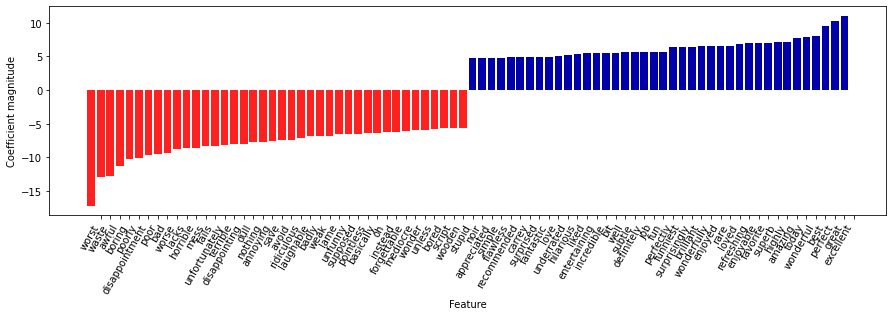

In [63]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40)

모델의 계수 분석

## N-gram

- 순서를 고려하여
- 토큰 하나 = 유니그램, 두 개 = 바이그램, 세 개 = 트라이그램
- ngram_range 파라미터로 설정 가능함

In [64]:
# 유니그램
vect = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("어휘 사전의 크기 : ", len(vect.vocabulary_))
print("어휘 사전의 내용 : \n", vect.vocabulary_)

어휘 사전의 크기 :  13
어휘 사전의 내용 : 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [65]:
# 바이그램
vect = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("어휘 사전의 크기 : ", len(vect.vocabulary_))
print("어휘 사전의 내용 : \n", vect.vocabulary_)

어휘 사전의 크기 :  14
어휘 사전의 내용 : 
 {'the fool': 9, 'fool doth': 3, 'doth think': 2, 'think he': 11, 'he is': 4, 'is wise': 6, 'but the': 1, 'the wise': 10, 'wise man': 13, 'man knows': 8, 'knows himself': 7, 'himself to': 5, 'to be': 12, 'be fool': 0}


In [66]:
# 트라이 그램
vect = CountVectorizer(ngram_range=(3,3)).fit(bards_words)
print("어휘 사전의 크기 : ", len(vect.vocabulary_))
print("어휘 사전의 내용 : \n", vect.vocabulary_)

어휘 사전의 크기 :  12
어휘 사전의 내용 : 
 {'the fool doth': 7, 'fool doth think': 2, 'doth think he': 1, 'think he is': 9, 'he is wise': 3, 'but the wise': 0, 'the wise man': 8, 'wise man knows': 11, 'man knows himself': 6, 'knows himself to': 5, 'himself to be': 4, 'to be fool': 10}


In [67]:
vect = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("어휘 사전의 크기 : ", len(vect.vocabulary_))
print("어휘 사전의 내용 : \n", vect.vocabulary_)


# 유니~트라이까지 전부 포함

어휘 사전의 크기 :  39
어휘 사전의 내용 : 
 {'the': 25, 'fool': 8, 'doth': 5, 'think': 30, 'he': 11, 'is': 17, 'wise': 36, 'the fool': 26, 'fool doth': 9, 'doth think': 6, 'think he': 31, 'he is': 12, 'is wise': 18, 'the fool doth': 27, 'fool doth think': 10, 'doth think he': 7, 'think he is': 32, 'he is wise': 13, 'but': 2, 'man': 22, 'knows': 19, 'himself': 14, 'to': 33, 'be': 0, 'but the': 3, 'the wise': 28, 'wise man': 37, 'man knows': 23, 'knows himself': 20, 'himself to': 15, 'to be': 34, 'be fool': 1, 'but the wise': 4, 'the wise man': 29, 'wise man knows': 38, 'man knows himself': 24, 'knows himself to': 21, 'himself to be': 16, 'to be fool': 35}


In [68]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())

param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range':[(1,1),(1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5).fit(text_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print("최상의 교차 검증 점수 : ", grid.best_score_)
print("최적 매개변수 : ", grid.best_params_)

최상의 교차 검증 점수 :  0.9064
최적 매개변수 :  {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


C=100, Tragram일때 가장 성능이 좋음

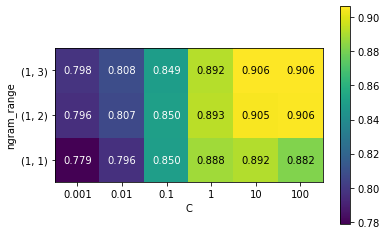

In [74]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap='viridis',
    fmt='%.3f', xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])

plt.colorbar(heatmap)

규제가 완화되고, ngram range의 범위도 넓어질수록 성능이 개선됨

성능이 개선되지만 사이즈가 많이 커지기 때문에 고려해서 파라미터 설정을 해야한다

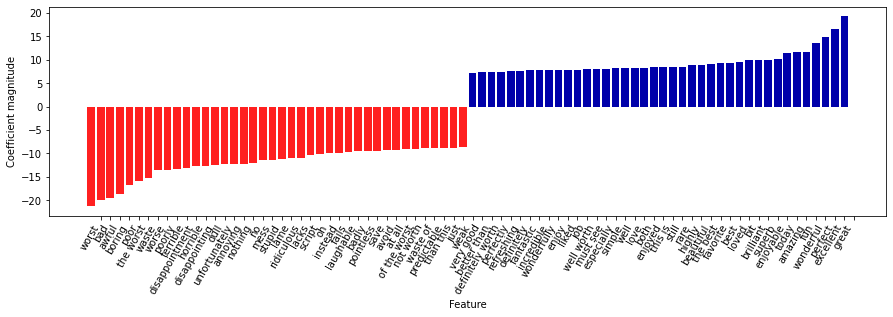

In [69]:
vect= grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40)

유니그램부터 트라이그램까지 포함된 결과

### 어간 추출 / 표제어 추출

- 어간! (단어의 뿌리)  drawback, drawbacks
- 표제어 (단어의 역할) 동사/비동사 등....


In [7]:
import en_core_web_sm
from nltk.stem.porter import PorterStemmer

nlp =  en_core_web_sm.load()
# spacy의 영어 모델
stemmer = PorterStemmer()
# nltk의 포터스티머 // 

# spacy는 표제어 추출을 하고 nltk는 어간 추출을 한다


def compare_spacy_nltk(doc):
    doc_spacy = nlp(doc)
    print("표제어 : ")
    print([token.lemma_ for token in doc_spacy])
    # 안의 lemma_ 에 표제어가 들어감
    
    print("어간 : ")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [100]:
compare_spacy_nltk(u"Our meeting today was worse than yesterday, "
                  "I'm scared of meeting the clients tomorrow.")

표제어 : 
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간 : 
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


어간은 was의 wa만 추출했고 표제어는 올바른 be를 추출함

worse도 bad / wors

일반적으로 표제어 추출은 어간 추출보다 훨씬 복잡한 처리를 하지만 더 좋은 결과를 낸다고 함

#### 표제어 추출 + tf-idf + ngram으로 테스트

In [8]:
def custom_tokenizer(doc):
    docs = nlp(doc)
    return [token.lemma_ for token in docs]

In [ ]:


pipe = make_pipeline(
    TfidfVectorizer(tokenizer=custom_tokenizer, min_df=5, ngram_range=(1,3)), 
    LogisticRegression(max_iter=5000)
    )

param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid, cv=5).fit(text_test, y_train)

## 토픽 모델링


- 비지도 학습!
- 문서를 하나 이상의 토픽에 할당
- 자주 나타나는 단어의 그룹 느낌
- LDA 잠재 디리클레 할당 / 선형판별분석과는 다른 것
- 성분 분석과 비슷함


- 훈련 샘플이 적을때 과대적합 방지를 위해서...

In [ ]:
vect = CountVectorizer(max_features=10000, max_df=.15)
# 15퍼센트!

X = vect.fit_transform(text_train)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10,
                               learning_method='batch', max_iter=25,
                               random_state=0)
# batch가 online보다 느리지만 성능이 더 낫다

topics = lda.fit_transform(X)
lda.components_.shape

In [ ]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# 토픽마다 특성을 내림차순으로...

feature_names = np.array(vect.get_feature_names)

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=10)